In [40]:
import pandas as pd
import mne
import os
import numpy as np
from mne.time_frequency import tfr_morlet
import matplotlib.pyplot as plt

In [4]:
ROOT_preproc='/data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad/'
list_subs=os.listdir(ROOT_preproc)

In [5]:
preproc_cue_eps={}
preproc_probe_eps={}
for s in list_subs:
    cue=mne.read_epochs(ROOT_preproc+s+'/'+'cue-epo.fif')
    probe=mne.read_epochs(ROOT_preproc+s+'/'+'probe events-epo.fif')
    preproc_cue_eps[s]=cue
    preproc_probe_eps[s]=probe

Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad/224/cue-epo.fif ...
    Found the data of interest:
        t =   -1300.78 ...    1000.00 ms
        0 CTF compensation matrices available
660 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 15 columns
0 projection items activated
Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad/224/probe events-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    5400.39 ms
        0 CTF compensation matrices available
660 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 15 columns
0 projection items activated
Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad/214/cue-epo.fif ...
    Found the data of interest:
        t =   -1300.78 ...    1000.00 ms
        0 CTF compensation matrices available
592 matching events found
Applying baseline correction (mode:

Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad/233/probe events-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    5400.39 ms
        0 CTF compensation matrices available
593 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 37 columns
0 projection items activated
Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad/240/cue-epo.fif ...
    Found the data of interest:
        t =   -1300.78 ...    1000.00 ms
        0 CTF compensation matrices available
599 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 37 columns
0 projection items activated
Reading /data/backed_up/shared/AlphaStudy_data/placeholders/preproc_EEG_matchingBrad/240/probe events-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    5400.39 ms
        0 CTF compensation matrices available
599 matching events found
Applying baseline correcti

In [6]:
preproc_cue_eps

{'224': <EpochsFIF  |   660 events (all good), -1.30078 - 1 sec, baseline [-1.30078, -0.3], ~386.1 MB, data loaded, with metadata,
  'disLongCue_trig': 110
  'disShortCue_trig': 110
  'neutLongCue_trig': 110
  'neutShortCue_trig': 110
  'tarLongCue_trig': 110
  'tarShortCue_trig': 110>,
 '214': <EpochsFIF  |   592 events (all good), -1.30078 - 1 sec, baseline [-1.30078, -0.3], ~346.3 MB, data loaded, with metadata,
  'disLongCue_trig': 99
  'disShortCue_trig': 100
  'neutLongCue_trig': 98
  'neutShortCue_trig': 98
  'tarLongCue_trig': 98
  'tarShortCue_trig': 99>,
 '211': <EpochsFIF  |   590 events (all good), -1.30078 - 1 sec, baseline [-1.30078, -0.3], ~345.1 MB, data loaded, with metadata,
  'disLongCue_trig': 97
  'disShortCue_trig': 98
  'neutLongCue_trig': 99
  'neutShortCue_trig': 99
  'tarLongCue_trig': 99
  'tarShortCue_trig': 98>,
 '206': <EpochsFIF  |   597 events (all good), -1.30078 - 1 sec, baseline [-1.30078, -0.3], ~349.2 MB, data loaded, with metadata,
  'disLongCue_tr

In [7]:
example=preproc_cue_eps['214']

In [8]:
freqs=np.arange(.5,38.,2.)
n_cycles = freqs / 2.


tfr_disLongCue=mne.time_frequency.tfr_morlet(example['disLongCue_trig'],freqs=freqs,n_cycles=n_cycles,average=True,
                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)

/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


In [9]:
print(freqs)
print(len(freqs))

[ 0.5  2.5  4.5  6.5  8.5 10.5 12.5 14.5 16.5 18.5 20.5 22.5 24.5 26.5
 28.5 30.5 32.5 34.5 36.5]
19


In [10]:
#tfr_disLongCue.plot(vmin=-15,vmax=15)

In [11]:
tfr_disLongCue.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
#tfr_disLongCue.plot_topo(vmin=-10,vmax=10)
tfr_disLongCue_frontals=tfr_disLongCue.copy().pick_channels(['F1','Fz','F2','FC1','FCz','FC2'])

Applying baseline correction (mode: zscore)


In [12]:
tfr_disLongCue_frontals.plot(picks='all',vmin=-7.50,vmax=7.5)

No baseline correction applied


<Figure size 640x480 with 2 Axes>

<Figure size 640x480 with 2 Axes>

In [13]:
#tfr_disLongCue_frontals_avged=tfr_disLongCue_frontals.data.mean(axis=0)

In [14]:
tfr_disLongCue.data.shape

(64, 19, 590)

In [15]:
#tfr_disLongCue_frontals.data.shape

In [16]:
tfr_disLongCue_posts=tfr_disLongCue.copy().pick_channels(['P1','Pz','P2','P3','P4','PO3','PO4','POz'])

No baseline correction applied


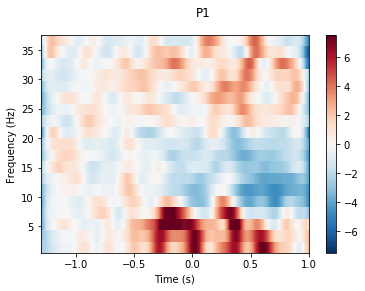

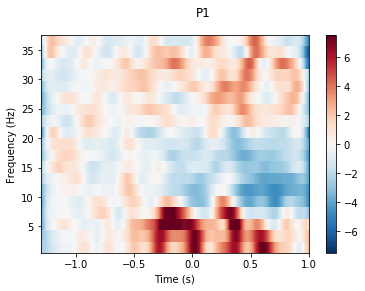

In [17]:
tfr_disLongCue_posts.plot(picks='all',vmin=-7.50,vmax=7.5)

In [18]:
#tfr_disShortCue=mne.time_frequency.tfr_morlet(example['disShortCue_trig'],freqs=freqs,n_cycles=n_cycles,average=True,
#                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)
#tfr_disShortCue.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))

In [19]:
#dislongMinusShort=tfr_disLongCue-tfr_disShortCue

#dislongMinusShort.plot(vmin=-10,vmax=10,picks=['P1','Pz','P2','P3','P4','PO3','PO4','POz'])

In [20]:
tfr_neutLongCue=mne.time_frequency.tfr_morlet(example['neutLongCue_trig'],freqs=freqs,n_cycles=n_cycles,average=True,
                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)
tfr_neutLongCue.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))

disMinusNeut_longCue=tfr_disLongCue-tfr_neutLongCue
#disMinusNeut_longCue.plot(vmin=-7,vmax=7,picks=['P1','Pz','P2','P3','P4','PO3','PO4','POz'])
#disMinusNeut_longCue.plot(vmin=-7,vmax=7,picks=['F1','Fz','F2','FC1','FCz','FC2'])

/home/dcellier/condaenvs/p3env/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Applying baseline correction (mode: zscore)


# Plotting ea sub

## Contrast ([distractor cue, long SOA] - [neutral cue, long SOA])
### Timing of the epochs: -500 is the onset of the grey placeholders, 0 is the onset of the colored cues for either 100ms or 1000ms





PLOTTING SUB 224
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


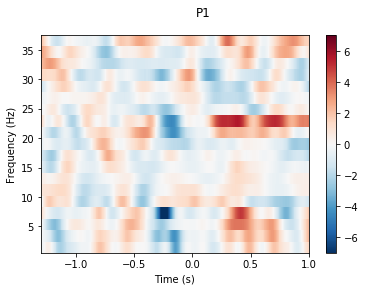

Frontal Chs:
No baseline correction applied


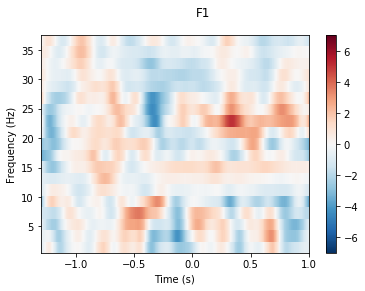





PLOTTING SUB 214
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


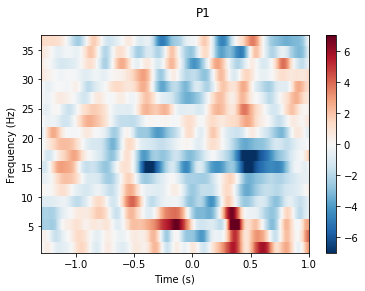

Frontal Chs:
No baseline correction applied


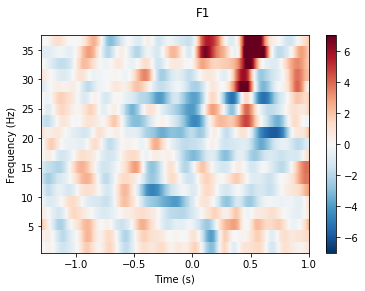





PLOTTING SUB 211
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


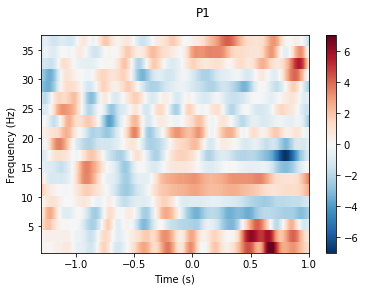

Frontal Chs:
No baseline correction applied


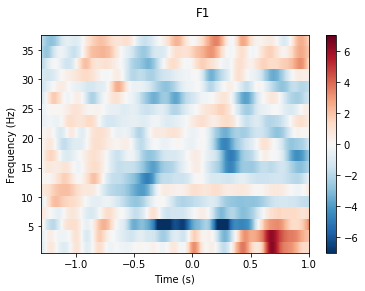





PLOTTING SUB 206
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


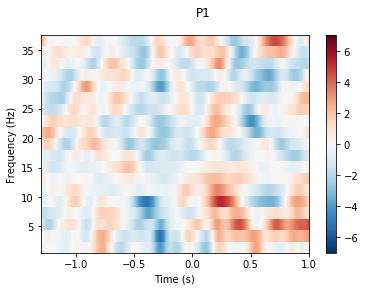

Frontal Chs:
No baseline correction applied


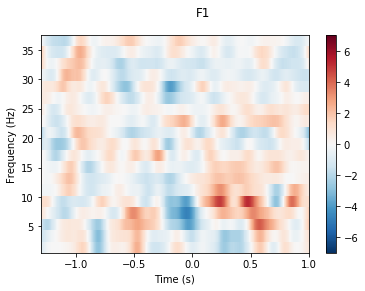





PLOTTING SUB 244
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


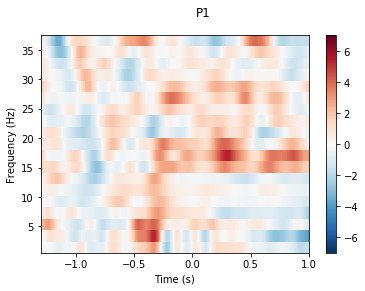

Frontal Chs:
No baseline correction applied


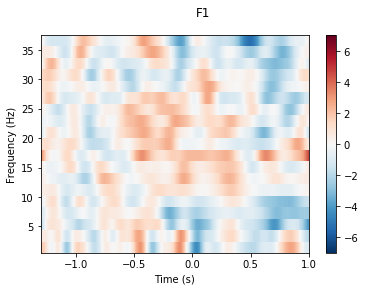





PLOTTING SUB 225
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


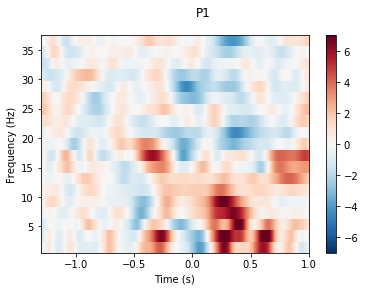

Frontal Chs:
No baseline correction applied


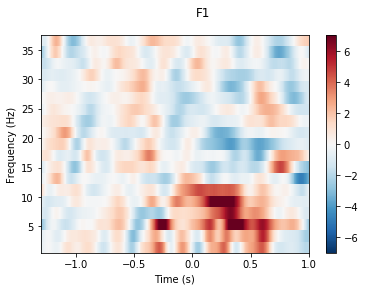





PLOTTING SUB 231
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


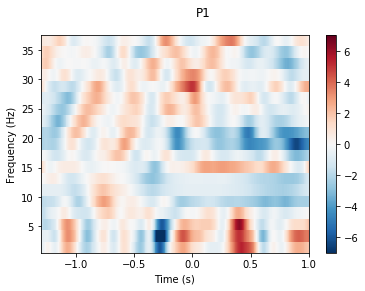

Frontal Chs:
No baseline correction applied


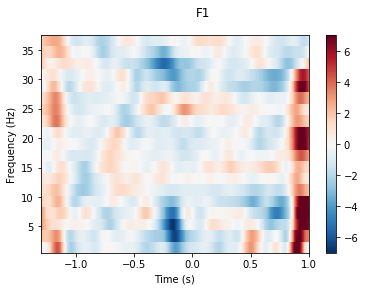





PLOTTING SUB 251
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


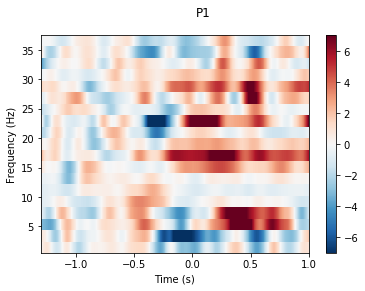

Frontal Chs:
No baseline correction applied


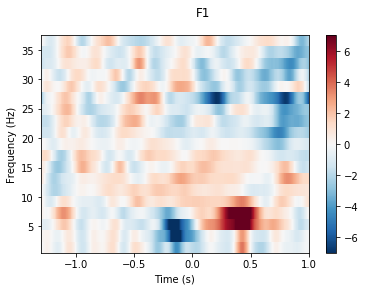





PLOTTING SUB 241
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


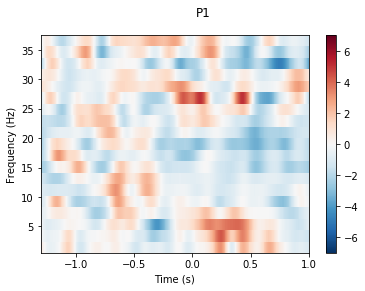

Frontal Chs:
No baseline correction applied


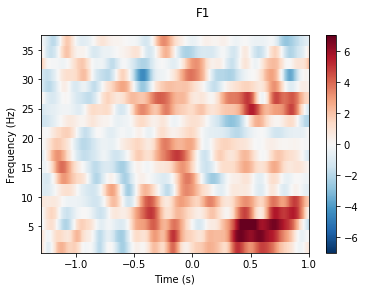





PLOTTING SUB 247
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


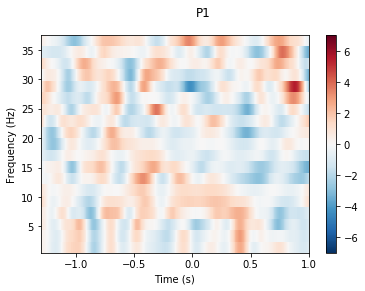

Frontal Chs:
No baseline correction applied


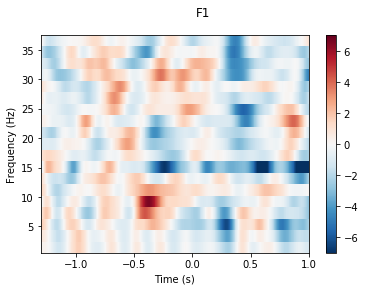





PLOTTING SUB 226
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


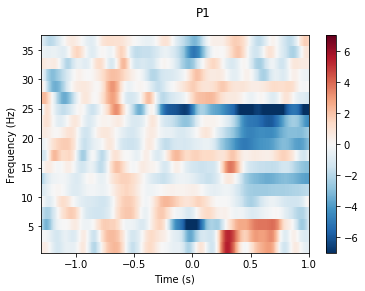

Frontal Chs:
No baseline correction applied


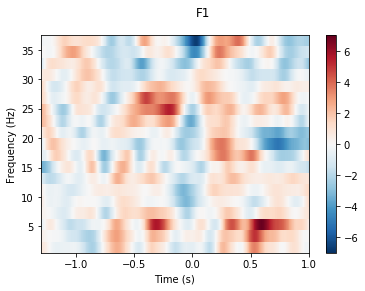





PLOTTING SUB 233
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


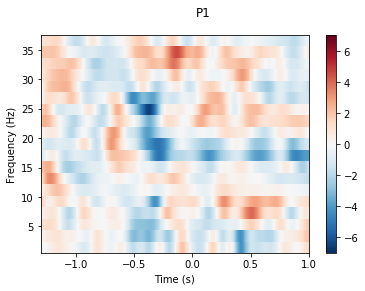

Frontal Chs:
No baseline correction applied


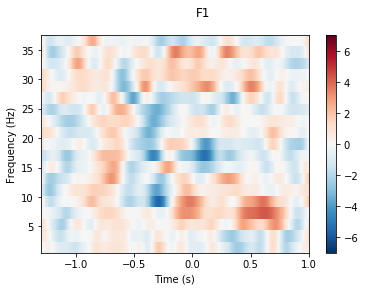





PLOTTING SUB 240
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


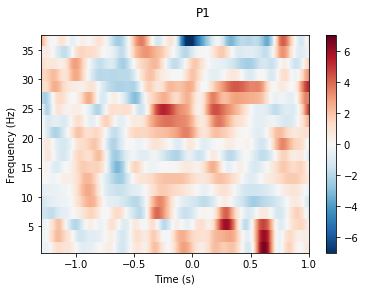

Frontal Chs:
No baseline correction applied


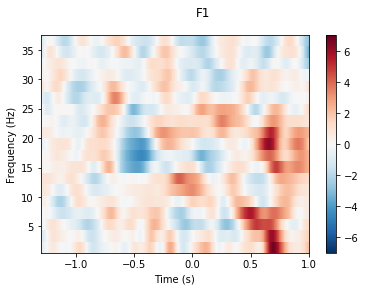





PLOTTING SUB 252
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


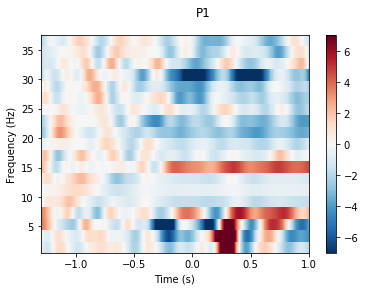

Frontal Chs:
No baseline correction applied


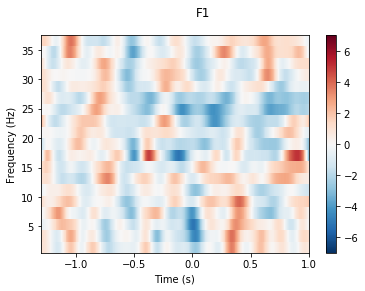





PLOTTING SUB 223
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


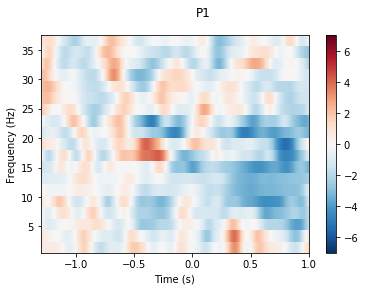

Frontal Chs:
No baseline correction applied


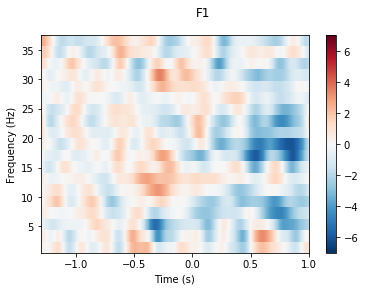





PLOTTING SUB 197
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


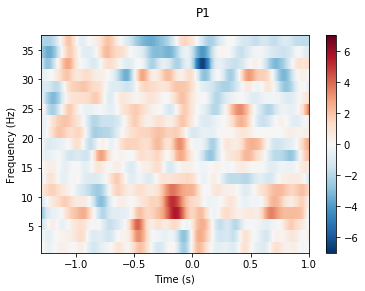

Frontal Chs:
No baseline correction applied


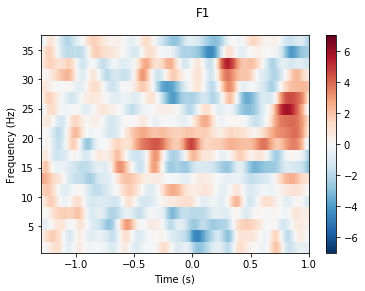





PLOTTING SUB 234
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


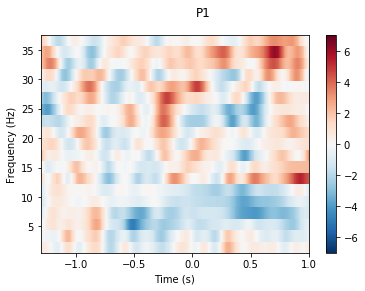

Frontal Chs:
No baseline correction applied


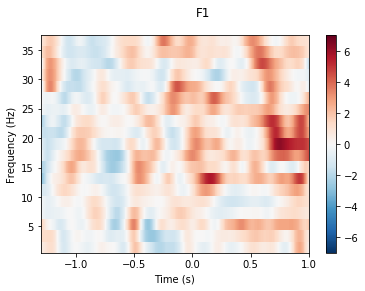





PLOTTING SUB 228
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


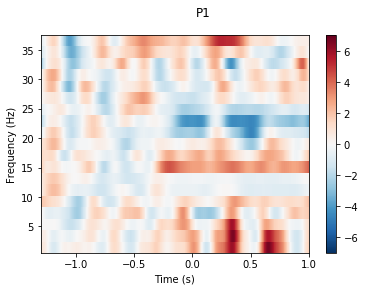

Frontal Chs:
No baseline correction applied


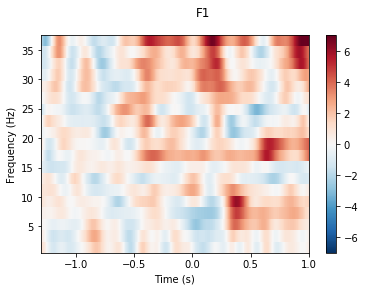





PLOTTING SUB 239
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


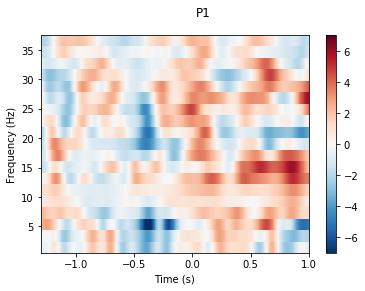

Frontal Chs:
No baseline correction applied


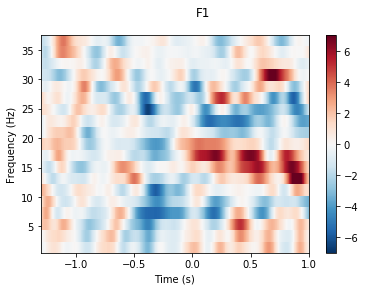





PLOTTING SUB 237
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


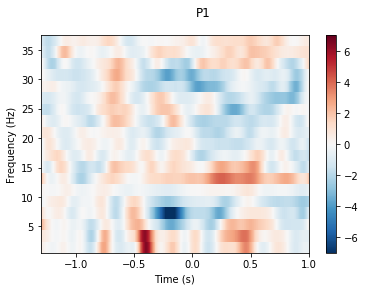

Frontal Chs:
No baseline correction applied


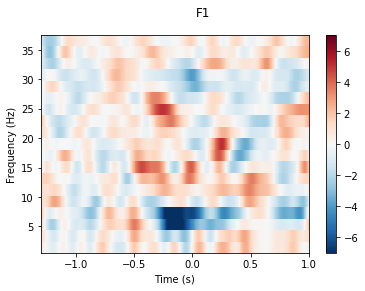

In [21]:
for s in list_subs:
    print('\n\n\n')
    thisSub=preproc_cue_eps[s]
    print('PLOTTING SUB %s' %s)
    tfr_disLongCue=mne.time_frequency.tfr_morlet(thisSub['disLongCue_trig'],freqs=freqs,n_cycles=n_cycles,average=True,
                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)
    tfr_neutLongCue=mne.time_frequency.tfr_morlet(thisSub['neutLongCue_trig'],freqs=freqs,n_cycles=n_cycles,average=True,
                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)
    tfr_neutLongCue.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
    tfr_disLongCue.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
    
    disMinusNeut_longCue=tfr_disLongCue-tfr_neutLongCue
    print('Posterior Chs:')
    disMinusNeut_longCue.plot(vmin=-7,vmax=7,picks=['P1','Pz','P2','P3','P4','PO3','PO4','POz'])
    print('Frontal Chs:')
    disMinusNeut_longCue.plot(vmin=-7,vmax=7,picks=['F1','Fz','F2','FC1','FCz','FC2'])

## [ Target, Long SOA Cue] - [neutral, long SOA cue]





PLOTTING SUB 224
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


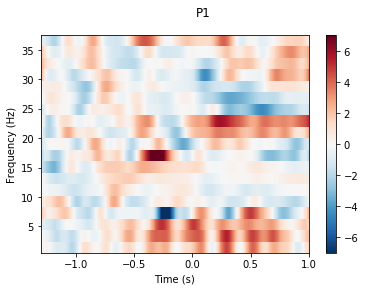

Frontal Chs:
No baseline correction applied


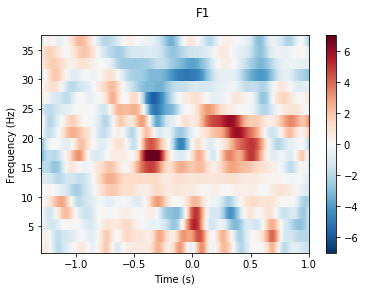





PLOTTING SUB 214
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


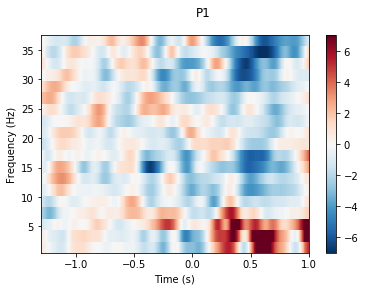

Frontal Chs:
No baseline correction applied


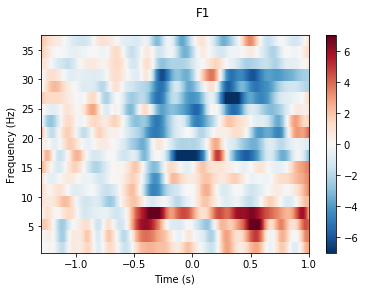





PLOTTING SUB 211
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Posterior Chs:
No baseline correction applied


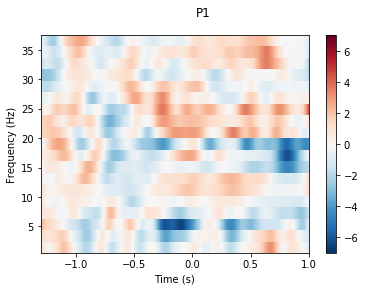

Frontal Chs:
No baseline correction applied


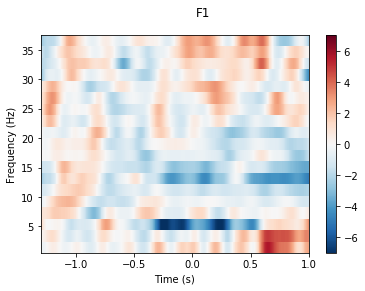





PLOTTING SUB 206


KeyboardInterrupt: 

In [22]:
for s in list_subs:
    print('\n\n\n')
    thisSub=preproc_cue_eps[s]
    print('PLOTTING SUB %s' %s)
    tfr_tarLongCue=mne.time_frequency.tfr_morlet(thisSub['tarLongCue_trig'],freqs=freqs,n_cycles=n_cycles,average=True,
                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)
    tfr_neutLongCue=mne.time_frequency.tfr_morlet(thisSub['neutLongCue_trig'],freqs=freqs,n_cycles=n_cycles,average=True,
                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)
    tfr_neutLongCue.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
    tfr_tarLongCue.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
    
    tarMinusNeut_longCue=tfr_tarLongCue-tfr_neutLongCue
    print('Posterior Chs:')
    tarMinusNeut_longCue.plot(vmin=-7,vmax=7,picks=['P1','Pz','P2','P3','P4','PO3','PO4','POz'])
    print('Frontal Chs:')
    tarMinusNeut_longCue.plot(vmin=-7,vmax=7,picks=['F1','Fz','F2','FC1','FCz','FC2'])

## [Dis, short SOA cue] - [neutral, short SOA cue]

In [ ]:
for s in list_subs:
    print('\n\n\n')
    thisSub=preproc_cue_eps[s]
    print('PLOTTING SUB %s' %s)
    tfr_disShortCue=mne.time_frequency.tfr_morlet(thisSub['disShortCue_trig'],freqs=freqs,n_cycles=n_cycles,average=True,
                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)
    tfr_neutShortCue=mne.time_frequency.tfr_morlet(thisSub['neutShortCue_trig'],freqs=freqs,n_cycles=n_cycles,average=True,
                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)
    tfr_neutShortCue.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
    tfr_disShortCue.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
    
    disMinusNeut_shortCue=tfr_disShortCue-tfr_neutShortCue
    print('Posterior Chs:')
    disMinusNeut_shortCue.plot(vmin=-7,vmax=7,picks=['P1','Pz','P2','P3','P4','PO3','PO4','POz'])
    print('Frontal Chs:')
    disMinusNeut_shortCue.plot(vmin=-7,vmax=7,picks=['F1','Fz','F2','FC1','FCz','FC2'])

## [Tar short SOA] - [neut short SOA]

In [ ]:
for s in list_subs:
    print('\n\n\n')
    thisSub=preproc_cue_eps[s]
    print('PLOTTING SUB %s' %s)
    tfr_tarShortCue=mne.time_frequency.tfr_morlet(thisSub['tarShortCue_trig'],freqs=freqs,n_cycles=n_cycles,average=True,
                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)
    tfr_neutShortCue=mne.time_frequency.tfr_morlet(thisSub['neutShortCue_trig'],freqs=freqs,n_cycles=n_cycles,average=True,
                                             use_fft=True,return_itc=False, decim=2, n_jobs=1)
    tfr_neutShortCue.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
    tfr_tarShortCue.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
    
    tarMinusNeut_shortCue=tfr_tarShortCue-tfr_neutShortCue
    print('Posterior Chs:')
    tarMinusNeut_shortCue.plot(vmin=-7,vmax=7,picks=['P1','Pz','P2','P3','P4','PO3','PO4','POz'])
    print('Frontal Chs:')
    tarMinusNeut_shortCue.plot(vmin=-7,vmax=7,picks=['F1','Fz','F2','FC1','FCz','FC2'])

In [ ]:
preproc_cue_eps

# Avg over subs

In [23]:
all_conds=['tarShortCue_trig','disShortCue_trig','neutShortCue_trig',
           'tarLongCue_trig','disLongCue_trig','neutLongCue_trig']
all_subs_Cues={}


for cond in all_conds:  
    skeleton_obj=mne.time_frequency.tfr_morlet(preproc_cue_eps['228'][cond],freqs=freqs,n_cycles=n_cycles,
                                               average=True,use_fft=True,return_itc=False, decim=2, n_jobs=1)
    thisCond_allSubsDat=[]
    for s in list_subs:
        #print('\n\n\n')
        thisSub=preproc_cue_eps[s]
        print('extracting sub %s' %s)
        print(thisSub.get_data().shape)
        subDat=mne.time_frequency.tfr_morlet(thisSub[cond],freqs=freqs,n_cycles=n_cycles,average=True,
                                                 use_fft=True,return_itc=False, decim=2, n_jobs=1)
        print(subDat.data.shape)
        thisCond_allSubsDat.append(subDat.data)

    all_subs_thisCond=np.stack(thisCond_allSubsDat)
    print(all_subs_thisCond.shape)
    all_subs_thisCond=all_subs_thisCond.mean(axis=0)
    skeleton_obj.data=all_subs_thisCond
    
    skeleton_obj.apply_baseline(mode='zscore', baseline=(-1.300, -0.5))
    all_subs_Cues[cond]=skeleton_obj



extracting sub 224
(660, 65, 1179)
(64, 19, 590)
extracting sub 214
(592, 65, 1179)
(64, 19, 590)
extracting sub 211
(590, 65, 1179)
(64, 19, 590)
extracting sub 206
(597, 65, 1179)
(64, 19, 590)
extracting sub 244
(599, 65, 1179)
(64, 19, 590)
extracting sub 225
(600, 65, 1179)
(64, 19, 590)
extracting sub 231
(571, 65, 1179)
(64, 19, 590)
extracting sub 251
(599, 65, 1179)
(64, 19, 590)
extracting sub 241
(567, 65, 1179)
(64, 19, 590)
extracting sub 247
(596, 65, 1179)
(64, 19, 590)
extracting sub 226
(598, 65, 1179)
(64, 19, 590)
extracting sub 233
(596, 65, 1179)
(64, 19, 590)
extracting sub 240
(599, 65, 1179)
(64, 19, 590)
extracting sub 252
(600, 65, 1179)
(64, 19, 590)
extracting sub 223
(589, 65, 1179)
(64, 19, 590)
extracting sub 197
(578, 65, 1179)
(64, 19, 590)
extracting sub 234
(600, 65, 1179)
(64, 19, 590)
extracting sub 228
(578, 65, 1179)
(64, 19, 590)
extracting sub 239
(159, 65, 1179)
(64, 19, 590)
extracting sub 237
(598, 65, 1179)
(64, 19, 590)
(20, 64, 19, 590)
Ap

In [ ]:
a=mne.time_frequency.tfr_morlet(preproc_cue_eps['225'][cond],freqs=freqs,n_cycles=n_cycles,average=True,
                                                 use_fft=True,return_itc=False, decim=2, n_jobs=1)
b=mne.time_frequency.tfr_morlet(preproc_cue_eps['228'][cond],freqs=freqs,n_cycles=n_cycles,average=True,
                                                 use_fft=True,return_itc=False, decim=2, n_jobs=1)

In [ ]:
preproc_cue_eps['228'][cond]

In [24]:
all_subs_Cues['tarShortCue_trig'].data.shape

(64, 19, 590)

In [25]:
all_subs_Cues['tarShortCue_trig'].info['ch_names']

['Fp1',
 'AF7',
 'AF3',
 'F1',
 'F3',
 'F5',
 'F7',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'C1',
 'C3',
 'C5',
 'T7',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'P1',
 'P3',
 'P5',
 'P7',
 'P9',
 'PO7',
 'PO3',
 'O1',
 'Iz',
 'Oz',
 'POz',
 'Pz',
 'CPz',
 'Fpz',
 'Fp2',
 'AF8',
 'AF4',
 'AFz',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT8',
 'FC6',
 'FC4',
 'FC2',
 'FCz',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'TP8',
 'CP6',
 'CP4',
 'CP2',
 'P2',
 'P4',
 'P6',
 'P8',
 'P10',
 'PO8',
 'PO4',
 'O2']

In [26]:
all_subs_Cues['tarShortCue_trig'].pick_channels(['P1','P3','P5','P7','P9','PO7','PO3',
                                                 'P2','P4','P6','P8','P10','PO8','PO4'])

<AverageTFR  |  time : [-1.300781, 1.000000], freq : [0.500000, 36.500000], nave : 94, channels : 14, ~1.3 MB>

# Plotting "global" alpha, ie bilateral alpha in Channels 
## ['P1','P3','P5','P7','P9','PO7','PO3','P2','P4','P6','P8','P10','PO8','PO4']

In [27]:
tarShort_allSubs_posteriors=all_subs_Cues['tarShortCue_trig'].pick_channels(['P1','P3','P5','P7','P9','PO7','PO3',
                                                 'P2','P4','P6','P8','P10','PO8','PO4'])

In [30]:
tarShort_allSubs_posteriors.freqs[4:7]

array([ 8.5, 10.5, 12.5])

In [41]:
averaged_alphas={}
for cond in all_subs_Cues.keys():
    thisCond_allSubs_posteriors=all_subs_Cues[cond].pick_channels(['P1','P3','P5','P7','P9','PO7','PO3',
                                                 'P2','P4','P6','P8','P10','PO8','PO4'])
    print(thisCond_allSubs_posteriors.data.shape)
    thisCond_avgChs=thisCond_allSubs_posteriors.data[:,4:7,:].mean(axis=0) #averaging across channels
    print(thisCond_avgChs.shape)
    thisCond_avgFreqs=thisCond_avgChs.mean(axis=0) #averaging across freqs (within alpha band)
    print(thisCond_avgFreqs.shape)
    thisCond_avg=thisCond_avgFreqs.mean(axis=0) #averaging across timepoints
    print(thisCond_avg.shape)
    averaged_alphas[cond]=thisCond_avg

(14, 19, 590)
(3, 590)
(590,)
()
(14, 19, 590)
(3, 590)
(590,)
()
(14, 19, 590)
(3, 590)
(590,)
()
(14, 19, 590)
(3, 590)
(590,)
()
(14, 19, 590)
(3, 590)
(590,)
()
(14, 19, 590)
(3, 590)
(590,)
()


In [50]:

all_conds=list(averaged_alphas.keys())
all_conds

['tarShortCue_trig',
 'disShortCue_trig',
 'neutShortCue_trig',
 'tarLongCue_trig',
 'disLongCue_trig',
 'neutLongCue_trig']

In [45]:
averaged_alphas['tarShortCue_trig']

-3.1335254267834345

([<matplotlib.axis.XTick at 0x7ff99a10cda0>,
 <a list of 6 Text xticklabel objects>)

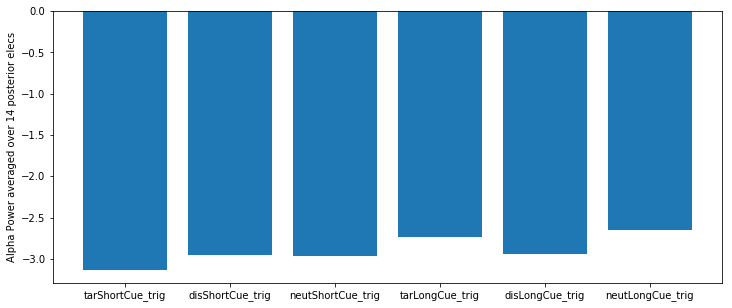

In [62]:
plt.figure(figsize=(12,5))
plt.bar(x=np.arange(6),height=[averaged_alphas[val] for val in all_conds])
plt.ylabel('Alpha Power averaged over 14 posterior elecs')
plt.xticks(np.arange(6),all_conds)
